In [1]:
import warnings
warnings.filterwarnings('ignore')

import shapely
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geopandas import GeoDataFrame
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
import seaborn as sns
from tqdm import tqdm
from pyproj import Geod
geod = Geod(ellps="WGS84")


from shapely import wkt
from tqdm.notebook import tqdm
tqdm.pandas()

from matplotlib import rc, rcParams
rc('font', weight='bold')

In [2]:
# houston = gpd.read_file(r"C:\Users\Lenovo\Downloads\tl_2018_48225_roads\tl_2018_48225_roads.shp")

In [6]:
import osmnx as ox 

In [7]:
# usa = ox.geocode_to_gdf('USA')

In [8]:
%%time

houston = ox.geocode_to_gdf('Houston,Texas, USA')

CPU times: total: 688 ms
Wall time: 718 ms


<AxesSubplot:>

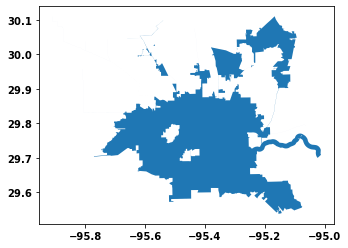

In [9]:
houston.plot()

In [17]:
center_of_the_city = Point((-95.4, 29.8))

# 2018 data

In [7]:
df_2018 = pd.read_parquet(r"E:\Data\Texas TropOmi data\Texas_2018_complete.parquet")
df_2018 = df_2018[(df_2018.Latitude >= 29.5) & (df_2018.Latitude <= 30.2) & \
                  (df_2018.Longitude <= -94.9) & (df_2018.Longitude >= -95.8)].reset_index(drop = True)

In [8]:
future_cols = df_2018.columns

In [9]:
df_2018['geometry'] = gpd.points_from_xy(x = df_2018['Longitude'], y = df_2018['Latitude'])
df_2018 = df_2018.set_geometry('geometry')
df_2018 = gpd.sjoin(df_2018, houston, predicate = 'within')[future_cols].reset_index(drop = True)
# df_2018['geometry'] = gpd.points_from_xy(x = df_2018['Longitude'], y = df_2018['Latitude'])

# 2019 data

In [10]:
df_2019 = pd.read_parquet(r"E:\Data\Texas TropOmi data\Texas_2019_complete.parquet")
df_2019 = df_2019[(df_2019.Latitude >= 29.5) & (df_2019.Latitude <= 30.2) & \
                  (df_2019.Longitude <= -94.9) & (df_2019.Longitude >= -95.8)].reset_index(drop = True)
df_2019['geometry'] = gpd.points_from_xy(x = df_2019['Longitude'], y = df_2019['Latitude'])
df_2019 = df_2019.set_geometry('geometry')
df_2019 = gpd.sjoin(df_2019, houston, predicate = 'within')[future_cols].reset_index(drop = True)

# 2020 data

In [11]:
df_2020 = pd.read_parquet(r"E:\Data\Texas TropOmi data\Texas_2020_complete.parquet")
df_2020 = df_2020[(df_2020.Latitude >= 29.5) & (df_2020.Latitude <= 30.2) & \
                  (df_2020.Longitude <= -94.9) & (df_2020.Longitude >= -95.8)].reset_index(drop = True)
df_2020['geometry'] = gpd.points_from_xy(x = df_2020['Longitude'], y = df_2020['Latitude'])
df_2020 = df_2020.set_geometry('geometry')
df_2020 = gpd.sjoin(df_2020, houston, predicate = 'within')[future_cols].reset_index(drop = True)

# 2021 data

In [12]:
df_2021 = pd.read_parquet(r"E:\Data\Texas TropOmi data\Texas_2021_complete.parquet")
df_2021 = df_2021[(df_2021.Latitude >= 29.5) & (df_2021.Latitude <= 30.2) & \
                  (df_2021.Longitude <= -94.9) & (df_2021.Longitude >= -95.8)].reset_index(drop = True)
df_2021['geometry'] = gpd.points_from_xy(x = df_2021['Longitude'], y = df_2021['Latitude'])
df_2021 = df_2021.set_geometry('geometry')
df_2021 = gpd.sjoin(df_2021, houston, predicate = 'within')[future_cols].reset_index(drop = True)

# Concatenating data

In [13]:
df = pd.concat([df_2018, df_2019, df_2020, df_2021]).reset_index(drop = True)

In [17]:
pwd

'C:\\Users\\Lenovo\\Desktop\\Texas TROPOMI\\Individual Cities\\Houston'

In [15]:
df.to_csv('Houston_Tropomi_csv.csv', index = True)

# Checking the data output

In [86]:
df['geometry'] = gpd.points_from_xy(x = df['Longitude'], y = df['Latitude'])

In [87]:
df = df.set_geometry('geometry')

<AxesSubplot:>

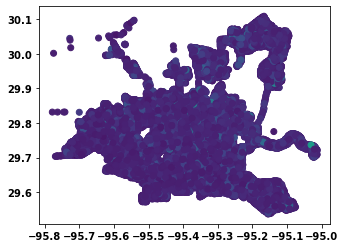

In [88]:
df.plot(column = 'ColumnAmountNO2Trop')